In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
uber_df = pd.read_csv(r"uberdrive.csv")

In [48]:
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [49]:
uber_df.isnull().values.any() #Checking missing values

True

In [50]:

uber_df.isnull().values.sum()

507

In [51]:
uber_df.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [52]:
uber_df.describe()

,MILES*
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [53]:
starting_point = uber_df["START*"].dropna()
starting_point
df = pd.DataFrame(starting_point.value_counts())
df
df.sort_values(["START*"], ascending = False)
df = df.reset_index()
df.iloc[0,:]
starting_point = uber_df["START*"].dropna()
df = pd.DataFrame(starting_point.value_counts())
df.sort_values(["START*"], ascending = False)
df = df.reset_index()
df = df.rename(columns = {'index':'starting_destination', 'START*':'Count'})
df.loc[df['Count'] == max(df['Count'])]

uber_df['START*'].value_counts().head(1)
#MOST POPULAR STARTING POINT

START*
Cary    201
Name: count, dtype: int64

In [54]:
#least popular dropping point
uber_df["STOP*"].value_counts().tail(1)

STOP*
Ilukwatta    1
Name: count, dtype: int64

In [55]:
#MOST FREQUENT ROUTE TAKEN
df = uber_df.dropna()
df = pd.DataFrame(df.groupby(['START*', 'STOP*']).size())
df = df.rename(columns = {0:'Count'})
df = df.sort_values(['Count'], ascending = False)
df.loc[df['Count'] == max(df['Count'])]

,,Count
START*,STOP*,
Cary,Morrisville,52


In [56]:
# PURPOSE STATISTICS OF RIDE
print(np.array(uber_df['PURPOSE*'].dropna().unique()))
uber_df['MILES*'].groupby(uber_df['PURPOSE*']).sum()

['Meal/Entertain' 'Errand/Supplies' 'Meeting' 'Customer Visit'
 'Temporary Site' 'Between Offices' 'Charity ($)' 'Commute' 'Moving'
 'Airport/Travel']


PURPOSE*
Airport/Travel       16.5
Between Offices     197.0
Charity ($)          15.1
Commute             180.2
Customer Visit     2089.5
Errand/Supplies     508.0
Meal/Entertain      911.7
Meeting            2851.3
Moving               18.2
Temporary Site      523.7
Name: MILES*, dtype: float64

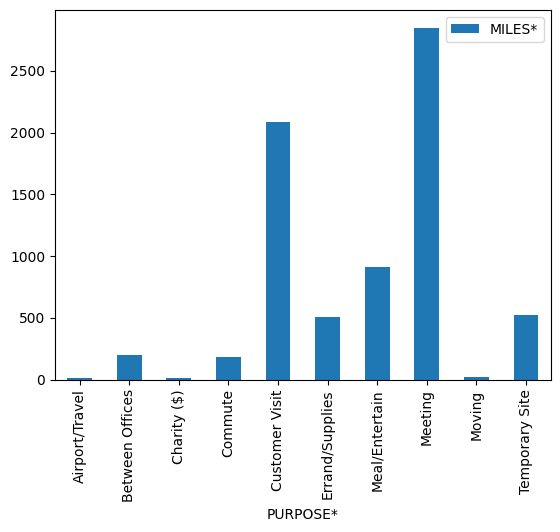

In [57]:
#PURPOSE VS DISTANCE VISUALIZATION
df = pd.DataFrame(uber_df['MILES*'].groupby(uber_df['PURPOSE*']).sum())
df.plot(kind = 'bar')
plt.show()


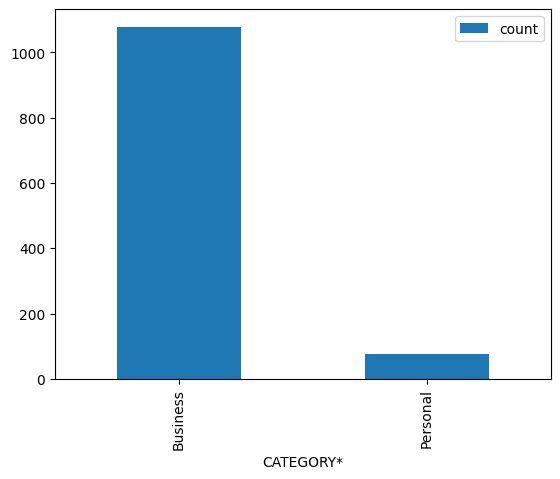

In [58]:
#VISUALIZING CATEGORY OF TRIPS
uber_df.head()

df = pd.DataFrame(uber_df['CATEGORY*'].value_counts())
df.reset_index()

df.plot(kind = 'bar')
plt.show()